In [144]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import torch 
from torch import nn, optim

from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from scipy.stats import wasserstein_distance
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [165]:
hidden_dim = 50
embedding_dim = 5
n_tokens = 100
n_clients = 20
n_sentences = 20
n_tokens_p_setence = 10

In [166]:
w_ie = np.random.normal(0, 1, size=(embedding_dim, n_tokens))
w_eh = np.random.normal(0, 1, size=(hidden_dim, embedding_dim))
w_hh = np.random.normal(0, 1, size=(hidden_dim, hidden_dim))   
w_ho = np.random.normal(0, 1, size=(n_tokens, hidden_dim))

In [167]:
def generate_clients(n_clusters=1, var=1):

    clients = []
    for client in range(n_clients):
      
        tokens = []
        
        init_token = client % n_clusters
        for _ in range(n_sentences):
            hidden = np.zeros(hidden_dim)
            token_n = init_token
            tokens.append(token_n)
            for _ in range(n_tokens_p_setence - 1):
                one_hot = np.zeros(n_tokens)
                one_hot[token_n] = 1
                embedding = w_ie @ one_hot
                hidden = np.tanh(w_hh @ hidden + w_eh @ embedding)
                output = w_ho @ hidden 
                softmax = np.exp(output) / np.sum(np.exp(output))
                token_n = np.random.choice(range(n_tokens), p=softmax)
                #token_n = np.argmax(softmax)
                tokens.append(token_n) 
        clients.append(tokens)
    return np.array(clients)

In [168]:
def kl(P, Q):
    return np.linalg.norm(P-Q,2)

# $P_i(X)$

## IID

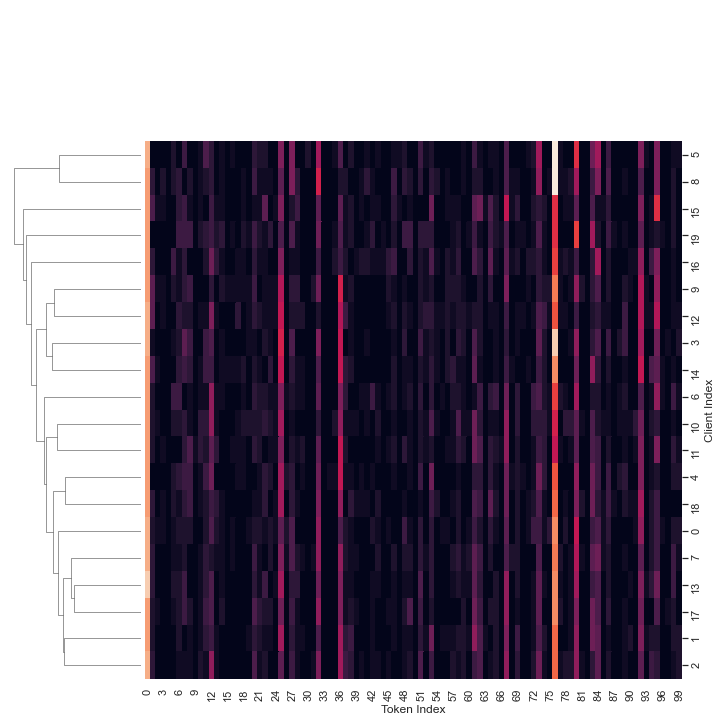

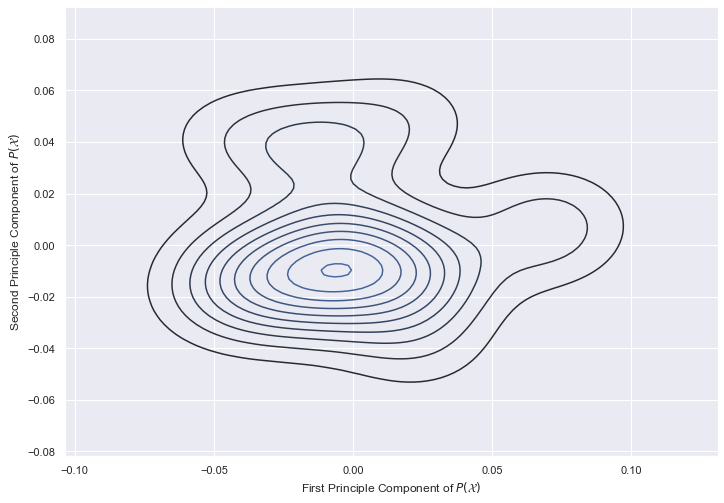

In [179]:
n_clusters = 1


clients = generate_clients(n_clusters=n_clusters)
freq = np.zeros((n_clients, n_tokens))
for i in range(n_tokens):
    freq[:,i] = np.sum(clients == i,axis=1)
freq /= (n_sentences * n_tokens_p_setence)
ax = sns.clustermap(freq, row_cluster=True, col_cluster=False)
fig= ax.ax_heatmap
ax.cax.set_visible(False)


fig.set(xlabel='Token Index', ylabel='Client Index')
plt.show()

tsne = PCA(n_components=2)

freq_tsne = tsne.fit_transform(freq)

#sns.scatterplot(freq_tsne[:,0], freq_tsne[:,1])

for i in range(n_clusters):
    sns.kdeplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
plt.xlabel('First Principle Component of $P(\mathcal{X})$')
plt.ylabel('Second Principle Component of $P(\mathcal{X})$')
plt.show()

0.0577708555364796


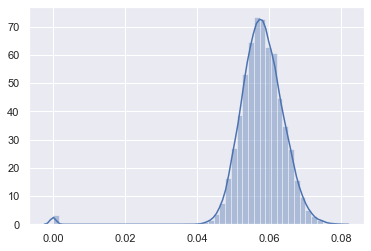

In [247]:
distribution_distance = []
for i in range(n_clients):
    for j in range(0, n_clients):
        distribution_distance.append(kl(freq[i], freq[j]))
print(sum(distribution_distance) / len(distribution_distance))
sns.distplot(distribution_distance)

## Five Clusters

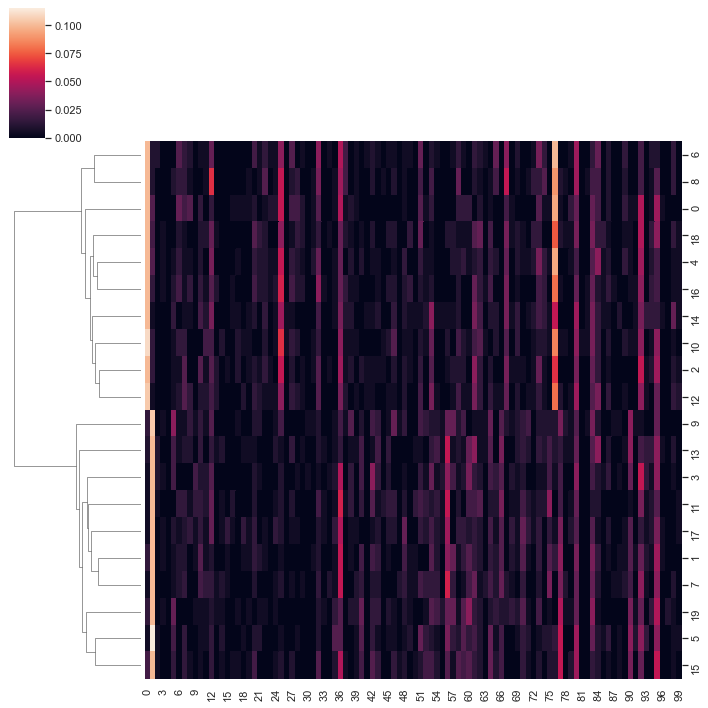

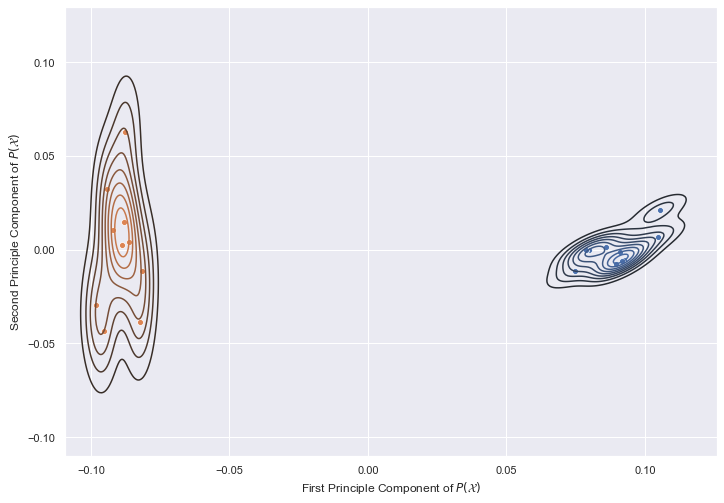

In [174]:
n_clusters = 2
clients = generate_clients(n_clusters=n_clusters)
freq = np.zeros((n_clients, n_tokens))
for i in range(n_tokens):
    freq[:,i] = np.sum(clients == i,axis=1)
freq /= (n_sentences * n_tokens_p_setence)
sns.clustermap(freq, col_cluster=False)
plt.show()

tsne = PCA(n_components=2)

freq_tsne = tsne.fit_transform(freq)
for i in range(n_clusters):
    sns.kdeplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
    sns.scatterplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
plt.xlabel('First Principle Component of $P(\mathcal{X})$')
plt.ylabel('Second Principle Component of $P(\mathcal{X})$')
plt.show()

0.055695223198105034


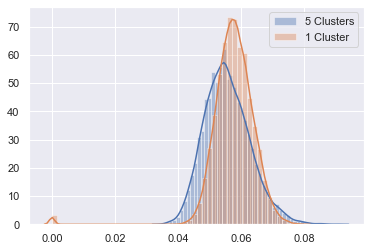

In [252]:
distribution_distance_5 = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_5.append(kl(freq[i], freq[j]))
print(sum(distribution_distance_5) / len(distribution_distance_5))
sns.distplot(distribution_distance_5, label='5 Clusters')
sns.distplot(distribution_distance, label='1 Cluster')
plt.legend()

## 20 Clusters

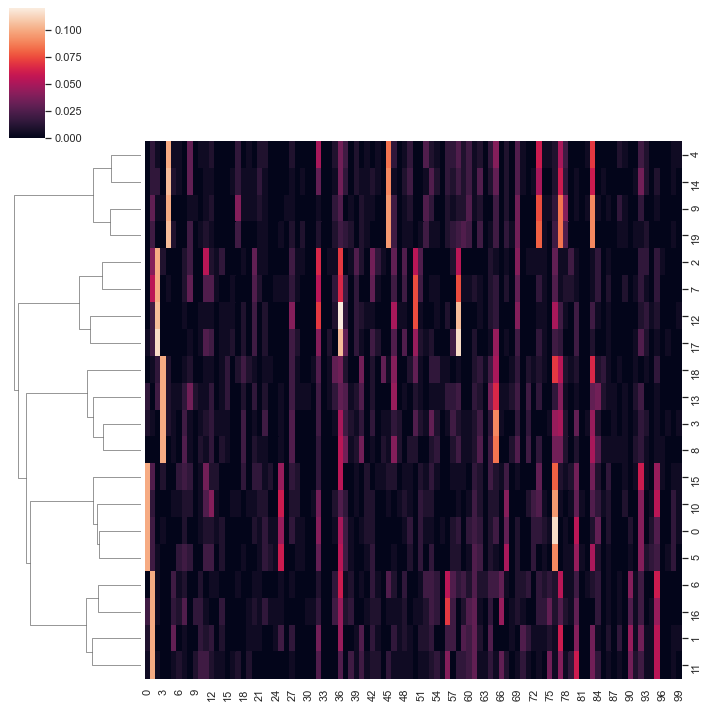

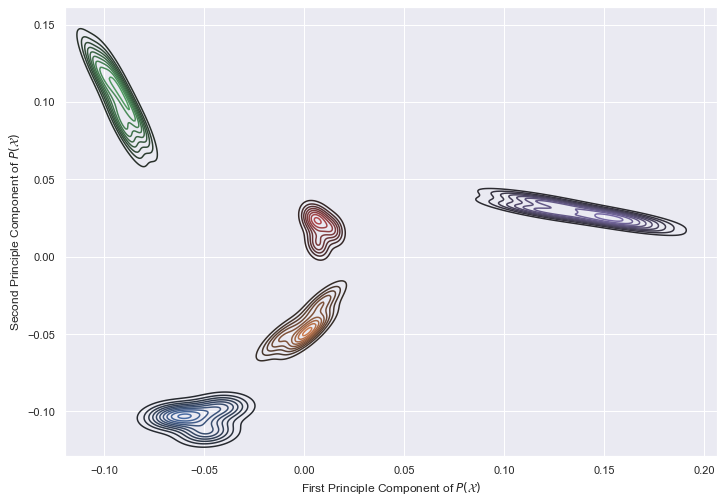

In [178]:
n_clusters = 5
clients = generate_clients(n_clusters=n_clusters)
freq = np.zeros((n_clients, n_tokens))
for i in range(n_tokens):
    freq[:,i] = np.sum(clients == i,axis=1)
freq /= (n_sentences * n_tokens_p_setence)

sns.clustermap(freq, col_cluster=False)
plt.show()

tsne = PCA(n_components=2)

freq_tsne = tsne.fit_transform(freq)
for i in range(n_clusters):
    sns.kdeplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
#sns.scatterplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
plt.xlabel('First Principle Component of $P(\mathcal{X})$')
plt.ylabel('Second Principle Component of $P(\mathcal{X})$')
plt.show()

0.1360249195095325


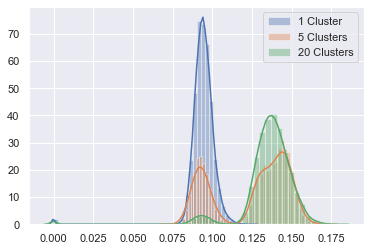

In [144]:
distribution_distance_20 = []
for i in range(n_clients):
    for j in range(0, n_clients):
        distribution_distance_20.append(kl(freq[i], freq[j]))
print(sum(distribution_distance_20) / len(distribution_distance_20))
sns.distplot(distribution_distance, label='1 Cluster', kde=True, bins=50)
sns.distplot(distribution_distance_5, label='5 Clusters',  kde=True, bins=50)
sns.distplot(distribution_distance_20, label='20 Clusters',   kde=True, bins=50)

plt.legend()

## 75 Clusters

/Users/shashwatdalal/.local/share/virtualenvs/niid_test-Meyna6jB/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


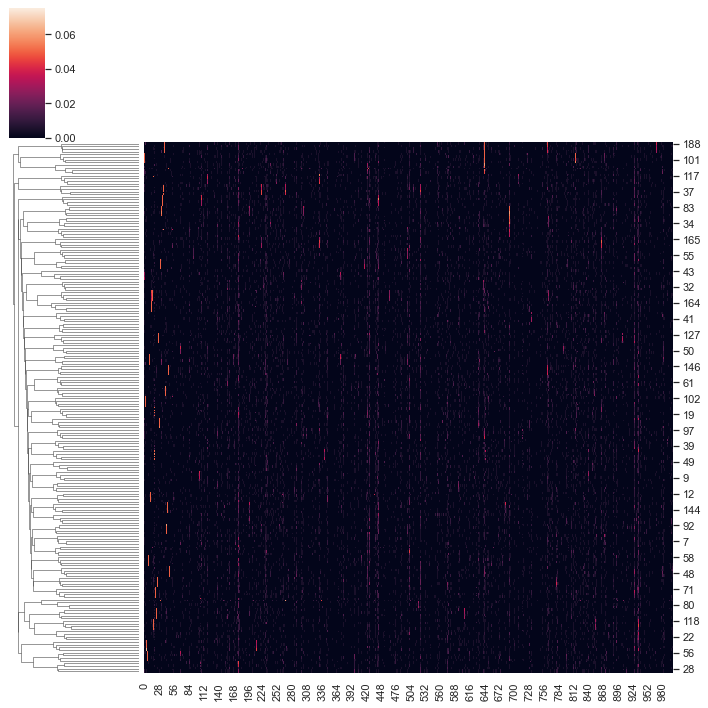

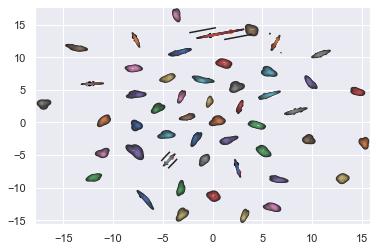

In [145]:
n_clusters = 50
clients = generate_clients(n_clusters=n_clusters)
freq = np.zeros((n_clients, n_tokens))
for i in range(n_tokens):
    freq[:,i] = np.sum(clients == i,axis=1)
freq /= (n_sentences * n_tokens_p_setence)
sns.clustermap(freq, col_cluster=False)
plt.show()

tsne = TSNE(n_components=2)

freq_tsne = tsne.fit_transform(freq)
for i in range(n_clusters):
    sns.kdeplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
    sns.scatterplot(freq_tsne[i::n_clusters][:,0], freq_tsne[i::n_clusters][:,1])
    
plt.show()

0.13813991787743438


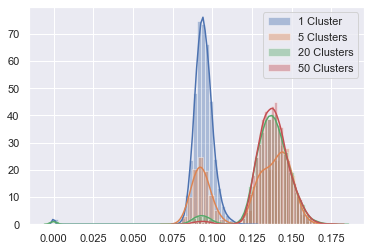

In [146]:
distribution_distance_50 = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_50.append(kl(freq[i], freq[j]))
print(sum(distribution_distance_50) / len(distribution_distance_50))
sns.distplot(distribution_distance, label='1 Cluster')
sns.distplot(distribution_distance_5, label='5 Clusters')
sns.distplot(distribution_distance_20, label='20 Clusters')
sns.distplot(distribution_distance_50, label='50 Clusters')
plt.legend()

In [ ]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [ ]:
distribution_distance_iid = []
for i in range(n_clients):
    for j in range(0, n_clients):
        distribution_distance_iid.append(wasserstein_distance(dist[i], dist[j]))

# Varry Embedding Matrix

### Std = 1

In [147]:
clients = generate_clients(var=10)

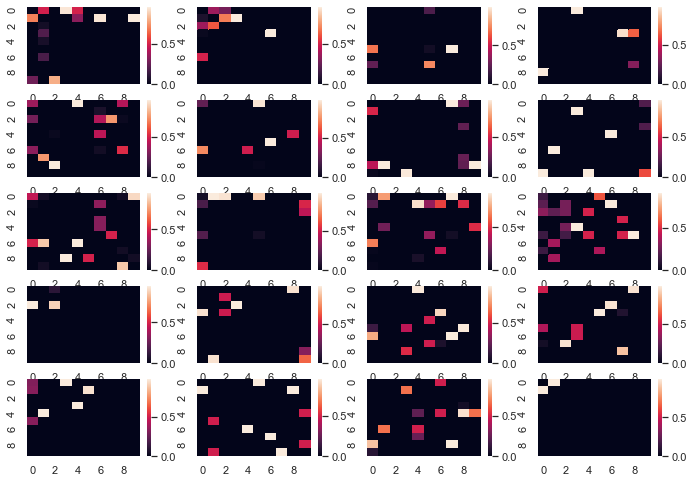

In [148]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [149]:
pca = PCA(n_components=2)
dist_pca_10 = pca.fit_transform(dist)

## std = 2

In [150]:
clients = generate_clients(var=1)

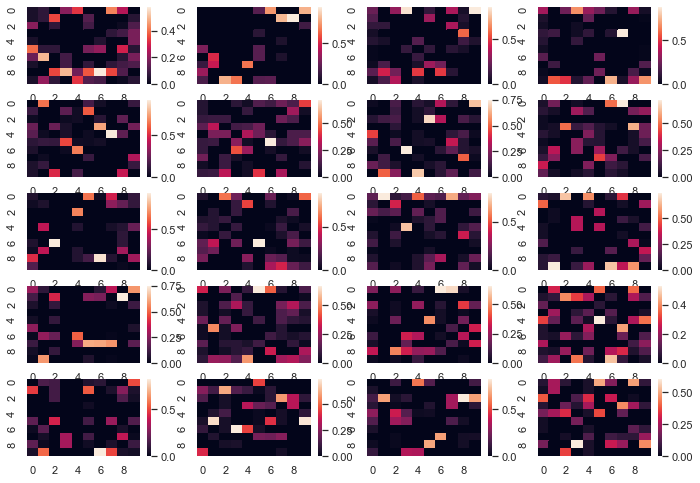

In [151]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [152]:
dist_pca_1 = pca.transform(dist)

In [153]:
clients = generate_clients(var=5)

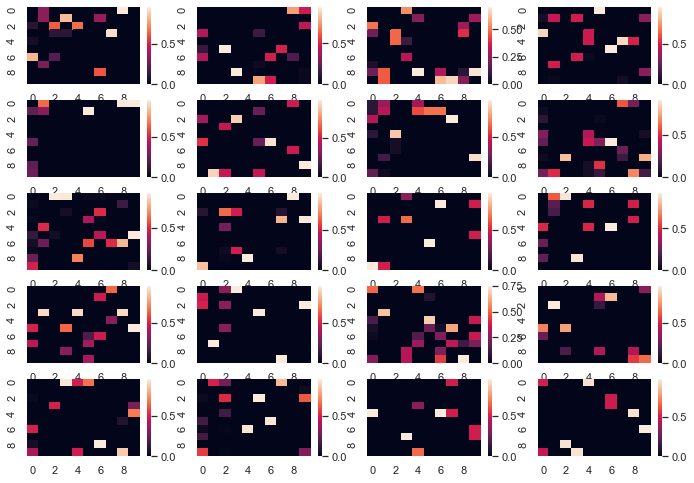

In [154]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

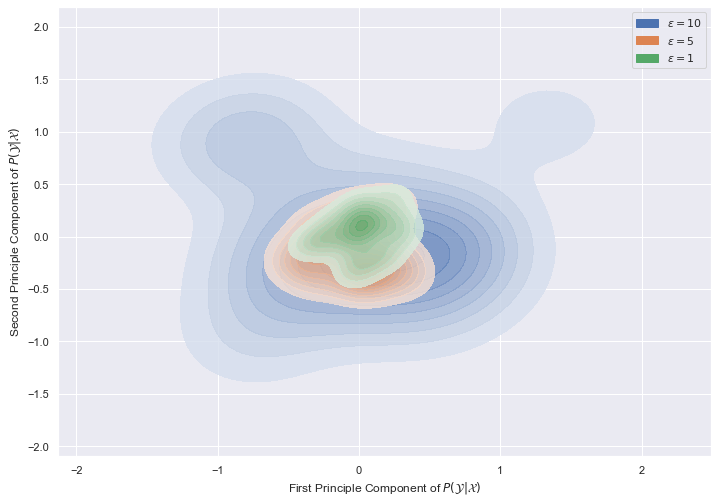

In [180]:
dist_pca_5 = pca.transform(dist)
sns.kdeplot(dist_pca_10[:,0],dist_pca_10[:,1], shade=True, shade_lowest=False, label='$ \epsilon = 10$', alpha=0.8)
sns.kdeplot(dist_pca_5[:,0],dist_pca_5[:,1], shade=True, shade_lowest=False, label='$ \epsilon = 5$', alpha=0.8)
sns.kdeplot(dist_pca_1[:,0],dist_pca_1[:,1], shade=True, shade_lowest=False, label='$ \epsilon = 1$', alpha=0.8)
plt.xlabel('First Principle Component of $P(\mathcal{Y}|\mathcal{X})$')
plt.ylabel('Second Principle Component of $P(\mathcal{Y}|\mathcal{X})$')
plt.legend()

## Vary Output Matrix

## Std = 1

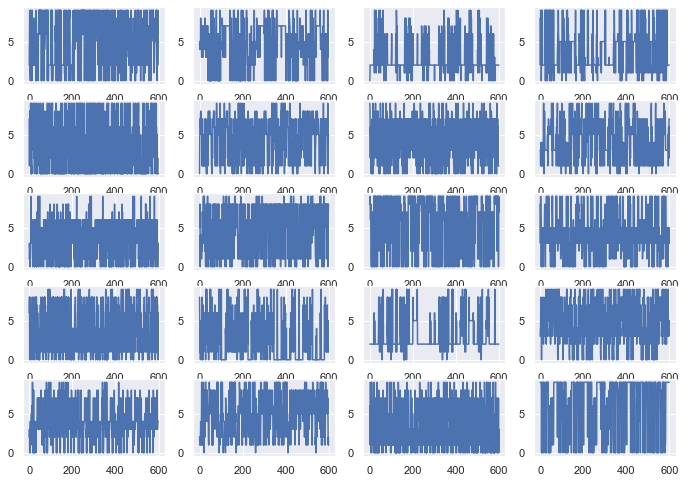

In [379]:
for i, client_tokens in enumerate(clients):
    plt.subplot(5,4, i+1)
    plt.plot(client_tokens)

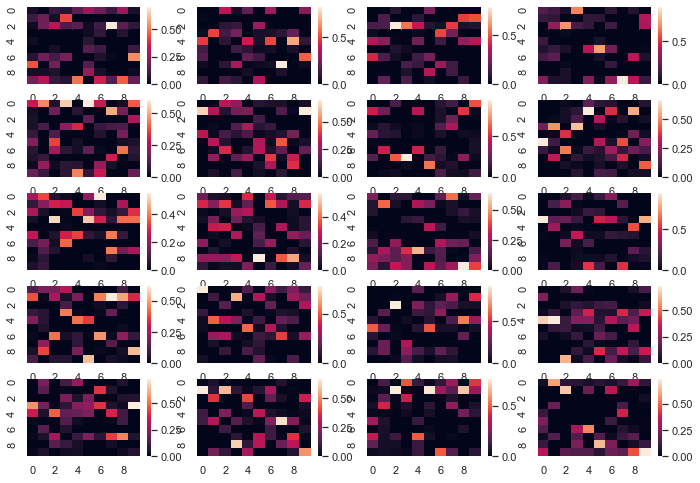

In [380]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [381]:
distribution_distance_output = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_output.append(wasserstein_distance(dist[i], dist[j]))

### std = 2

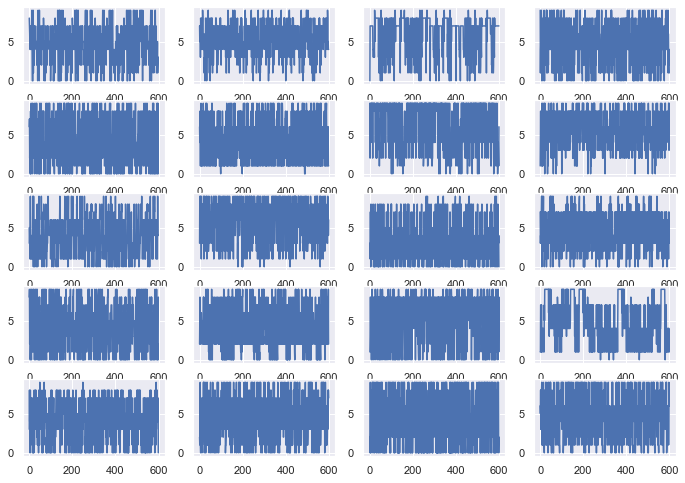

In [384]:
for i, client_tokens in enumerate(clients):
    plt.subplot(5,4, i+1)
    plt.plot(client_tokens)

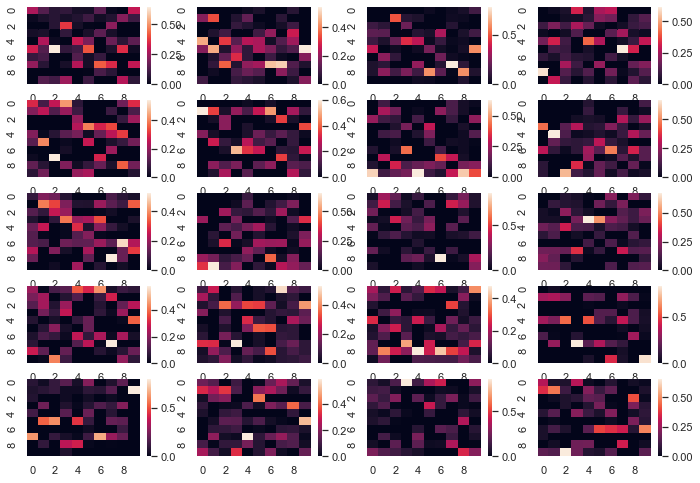

In [385]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [386]:
distribution_distance_output_2 = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_output_2.append(wasserstein_distance(dist[i], dist[j]))

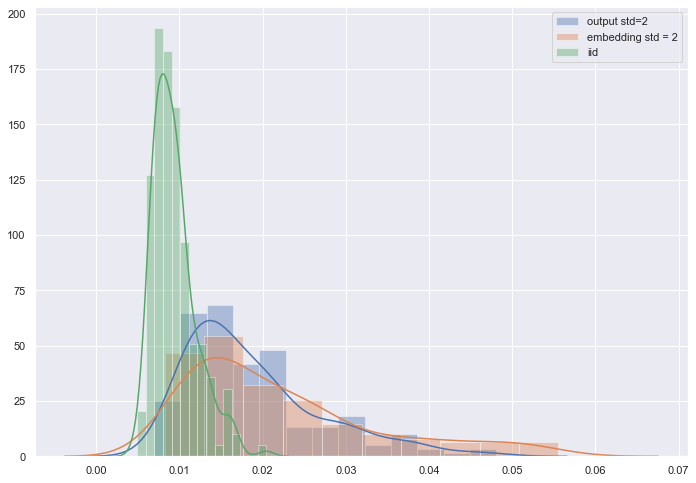

In [387]:
sns.distplot(distribution_distance_output_2, label='output std=2')
sns.distplot(distribution_distance_std_2, label='embedding std = 2')
sns.distplot(distribution_distance_iid, label='iid')
plt.legend()

## Combination of embedding and output

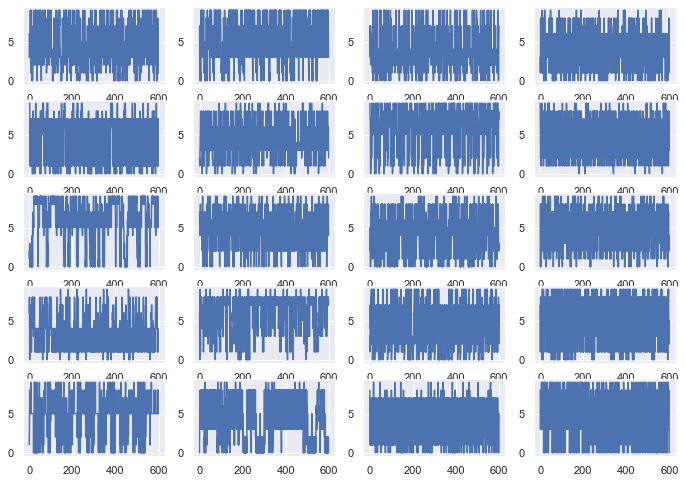

In [389]:
for i, client_tokens in enumerate(clients):
    plt.subplot(5,4, i+1)
    plt.plot(client_tokens)

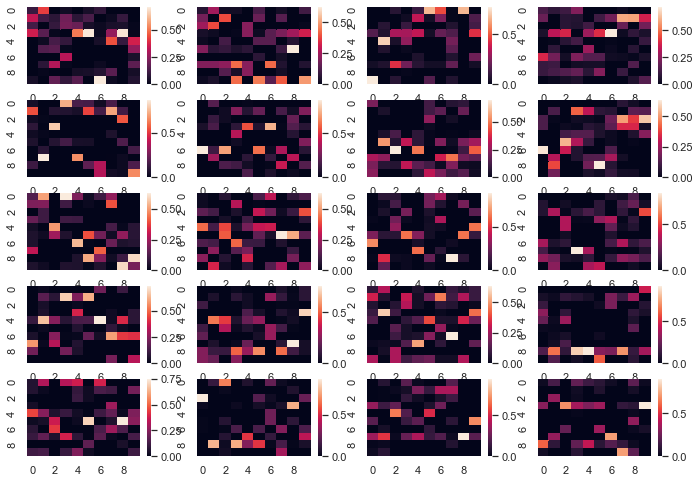

In [390]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [391]:
distribution_distance_comb_2 = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_comb_2.append(wasserstein_distance(dist[i], dist[j]))

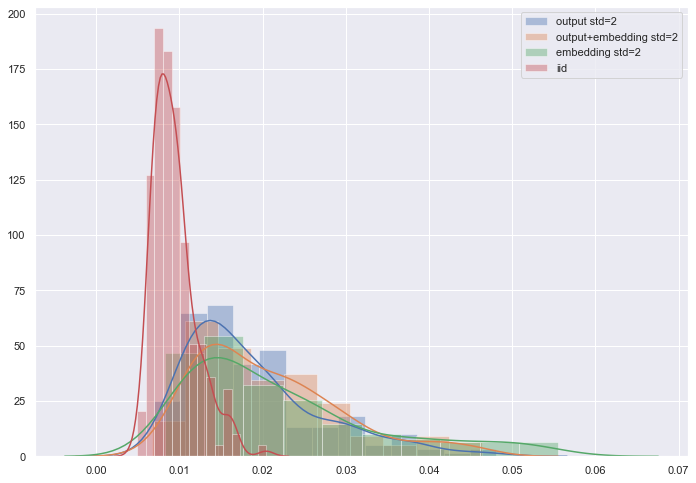

In [394]:
sns.distplot(distribution_distance_output_2, label='output std=2')
sns.distplot(distribution_distance_comb_2, label='output+embedding std=2')
sns.distplot(distribution_distance_std_2, label='embedding std=2')
sns.distplot(distribution_distance_iid, label='iid')
plt.legend()

## Hidden to Hidden Variation

std = 1

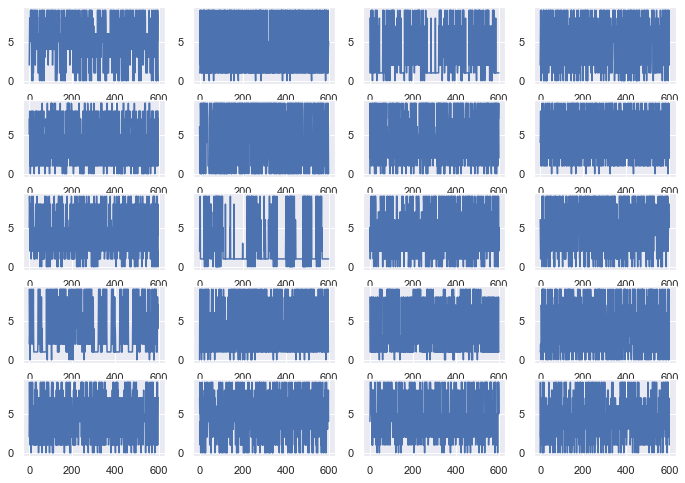

In [396]:
for i, client_tokens in enumerate(clients):
    plt.subplot(5,4, i+1)
    plt.plot(client_tokens)

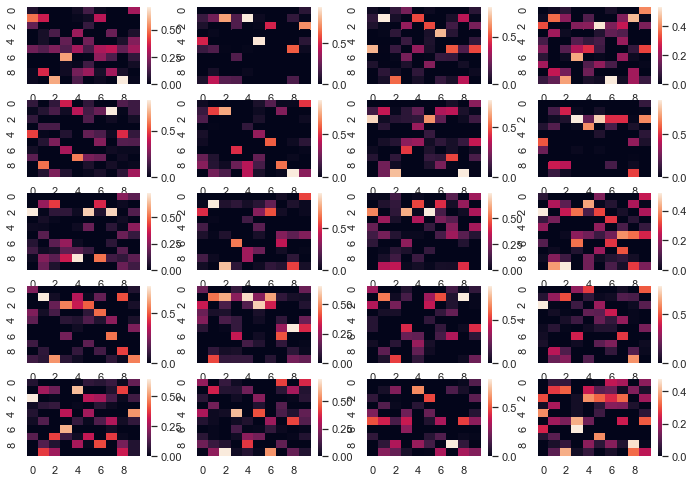

In [397]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [398]:
distribution_distance_hidden = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_hidden.append(wasserstein_distance(dist[i], dist[j]))

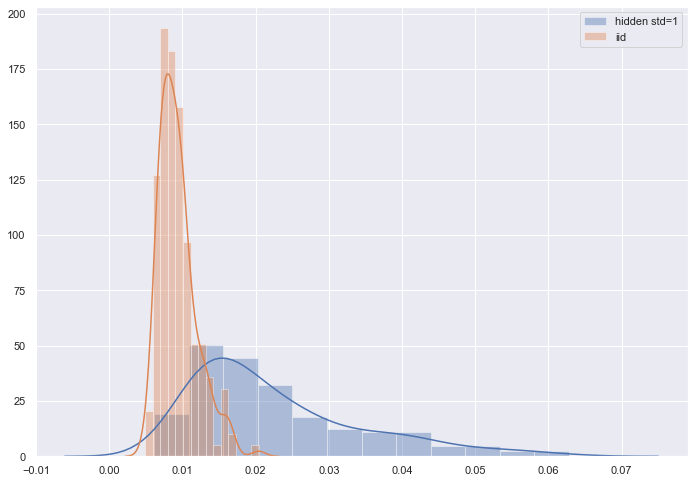

In [399]:
sns.distplot(distribution_distance_hidden, label='hidden std=1')
sns.distplot(distribution_distance_iid, label='iid')
plt.legend()

## std = 2

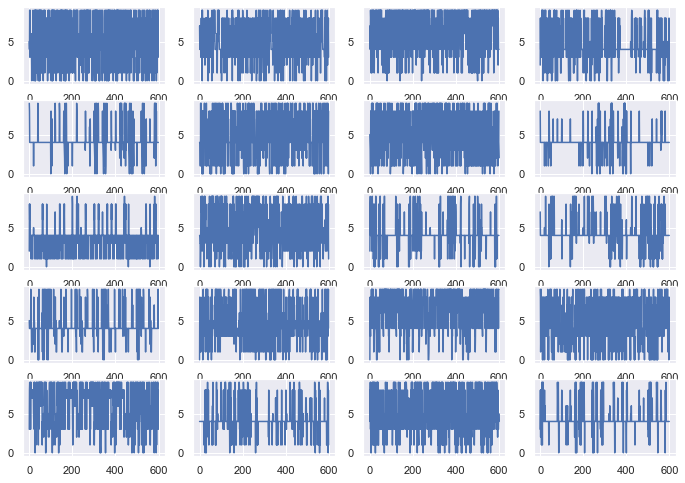

In [406]:
for i, client_tokens in enumerate(clients):
    plt.subplot(5,4, i+1)
    plt.plot(client_tokens)

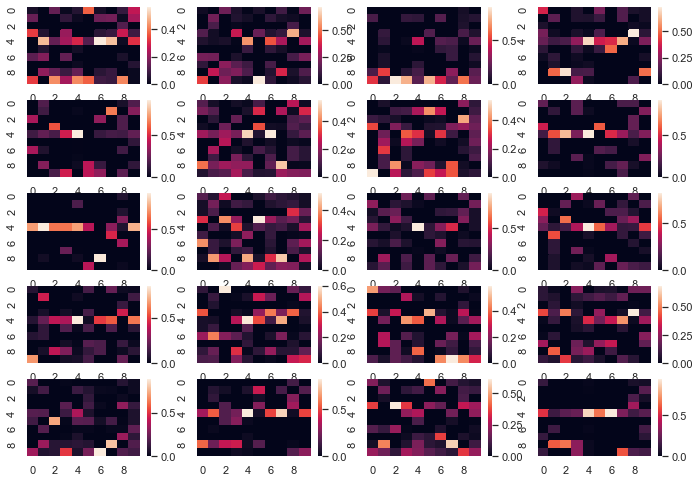

In [407]:
dist = []
for i, client_tokens in enumerate(clients):
    client_tokens = np.array(client_tokens)
    heatmap = np.zeros((n_tokens, n_tokens))
    for first, second in zip(client_tokens[:-1], client_tokens[1:]):
        heatmap[first, second] += 1
    plt.subplot(5,4, i+1)
    transition_prob = heatmap / (heatmap.sum(axis=0) + 1)
    sns.heatmap(transition_prob)
    dist.append(transition_prob.reshape(-1))

In [408]:
distribution_distance_hidden_2 = []
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distribution_distance_hidden_2.append(wasserstein_distance(dist[i], dist[j]))

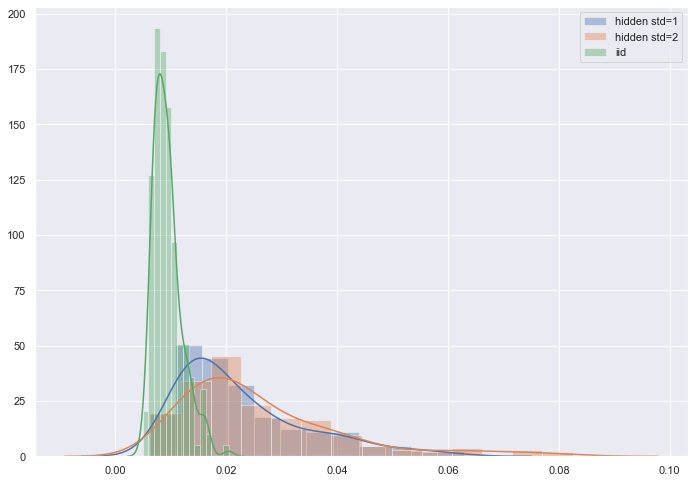

In [409]:
sns.distplot(distribution_distance_hidden, label='hidden std=1')
sns.distplot(distribution_distance_hidden_2, label='hidden std=2')
sns.distplot(distribution_distance_iid, label='iid')
plt.legend()